In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sys
sys.path.append('..')

from lib.ChurnEnsemble import ChurnEnsemble

SEED = 42
np.random.seed(SEED)

2024-06-26 02:59:03.813385: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('../files/churn-data-predict.csv')

data

,cid,id,tp,tfs,tte,ts,te,employees,mrr,value,...,usage_avg,usage_groups_avg,usage_payments_avg,paid_periods,failed_periods,active_periods,momentum,months,failed_ratio,usage_diff
0,51b46d18c4de615d0f000019,1,2017-07-01,4.0,-1.0,2017-03-01,NaN,1,26.58,159.50,...,2.00,0.0,0.0,0.0,0.0,1.0,0.00,4.0,NaN,0.00
1,51b46d18c4de615d0f000019,1,2017-08-01,5.0,-1.0,2017-03-01,NaN,1,26.58,159.50,...,2.00,0.0,0.0,0.0,0.0,2.0,1.20,5.0,NaN,0.00
2,51b46d18c4de615d0f000019,1,2017-09-01,6.0,-1.0,2017-03-01,NaN,1,26.58,239.25,...,2.00,0.0,0.0,1.0,0.0,3.0,-3.14,6.0,0.0,0.00
3,51b46d18c4de615d0f000019,1,2017-10-01,7.0,-1.0,2017-03-01,NaN,1,26.58,239.25,...,1.75,0.0,0.0,1.0,0.0,3.0,-13.60,7.0,0.0,-0.75
4,51b46d18c4de615d0f000019,1,2017-11-01,8.0,-1.0,2017-03-01,NaN,1,26.58,239.25,...,1.60,0.0,0.0,1.0,0.0,3.0,-18.57,8.0,0.0,-0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,66633bcee489710bb6afe3d9,2680,2024-06-01,0.0,-1.0,2024-06-01,NaN,1,101.97,101.97,...,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00
101762,666346aee489710bb6afead3,2681,2024-06-01,0.0,-1.0,2024-06-01,NaN,1,40.00,40.00,...,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00
101763,66634aea1e0bd65a73bf4f2f,2682,2024-06-01,0.0,-1.0,2024-06-01,NaN,1,46.62,46.62,...,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00
101764,666388b3e489710bb6b00925,2683,2024-06-01,0.0,-1.0,2024-06-01,NaN,1,60.19,60.19,...,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.00


In [3]:
# Load Ensemble model
model = ChurnEnsemble(
    seed=SEED,
    verbose=1,
    path='../files/ensemble'
).set_data(
    data
).load()

model.get_params()

Total Customers: 2.684 | Censored: 2.678 | Non-censored: 6 | Censored Rate 99,78%


{'wtte': {'nn': 24,
  'hl': 2,
  'lr': 0.0001,
  'epochs': 300,
  'batch': 512,
  'lr_decay': 10,
  'stop': 30,
  'dropout': 0.2,
  'weight_l1': 0,
  'weight_l2': 1e-05,
  'init_alpha': None,
  'max_beta': 2.0,
  'epsilon': 1e-08},
 'xgb': {'n': 200,
  'lr': 0.01,
  'max_depth': 16,
  'stop': 30,
  'metric': 'auc',
  'min_child_weight': 1,
  'gamma': 0,
  'weight_l1': 0,
  'weight_l2': 1,
  'dropout': 0.2,
  'shuffle': False,
  'reg_unb': True}}

In [4]:
# Predict
model.predict()

model.results

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


,id,tfs,pred,tgt,segment,wa,wb,momentum,cid
0,1,4,0.292852,0,3,19.864557,1.267884,0.00,51b46d18c4de615d0f000019
1,1,5,0.286491,0,3,22.683762,1.200466,1.20,51b46d18c4de615d0f000019
2,1,6,0.314261,1,4,23.612240,1.232184,-3.14,51b46d18c4de615d0f000019
3,1,7,0.371492,1,4,18.986633,1.056914,-13.60,51b46d18c4de615d0f000019
4,1,8,0.385054,1,4,15.584141,0.944319,-18.57,51b46d18c4de615d0f000019
...,...,...,...,...,...,...,...,...,...
101761,2680,0,0.579728,1,5,10.998804,0.936187,0.00,66633bcee489710bb6afe3d9
101762,2681,0,0.564262,1,5,13.892193,1.074853,0.00,666346aee489710bb6afead3
101763,2682,0,0.628535,1,5,11.334986,0.963761,0.00,66634aea1e0bd65a73bf4f2f
101764,2683,0,0.573623,1,5,13.499856,1.057204,0.00,666388b3e489710bb6b00925


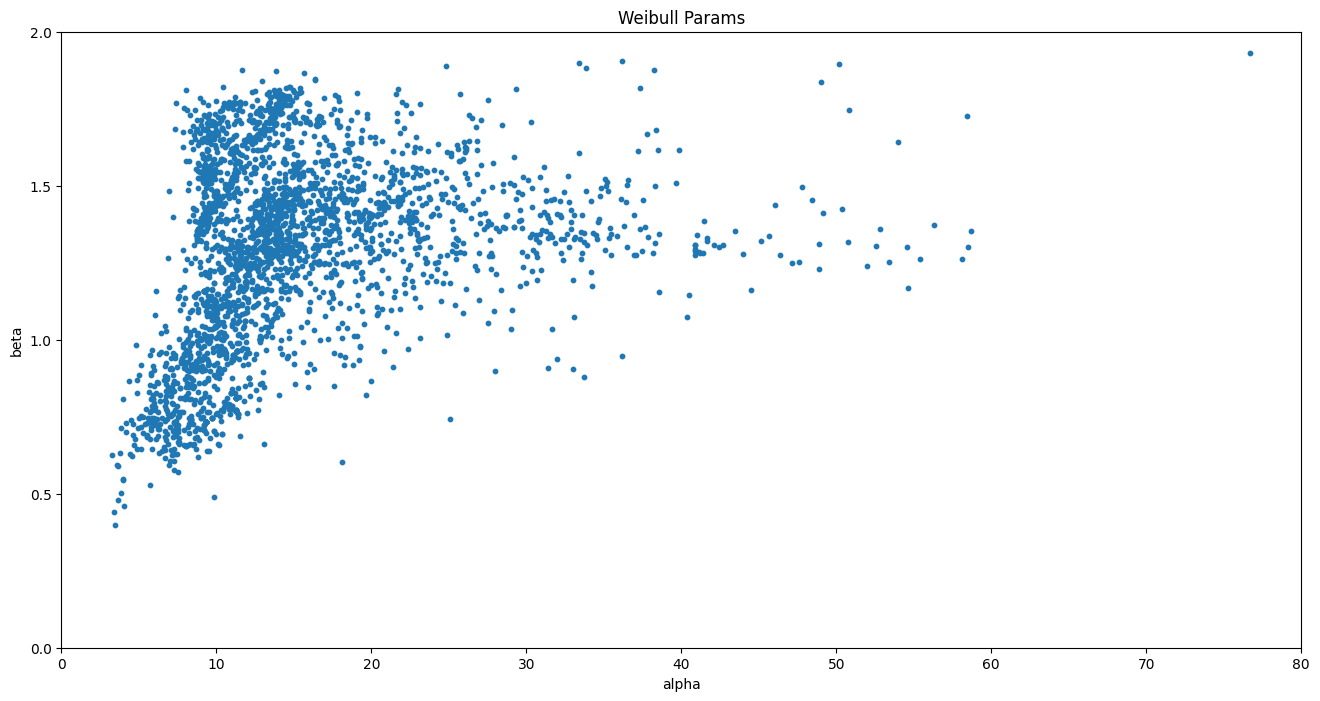

In [9]:
# Plot parameters distribution
model.wtte.plot_params_dist(model.wtte.results, loc=-1)

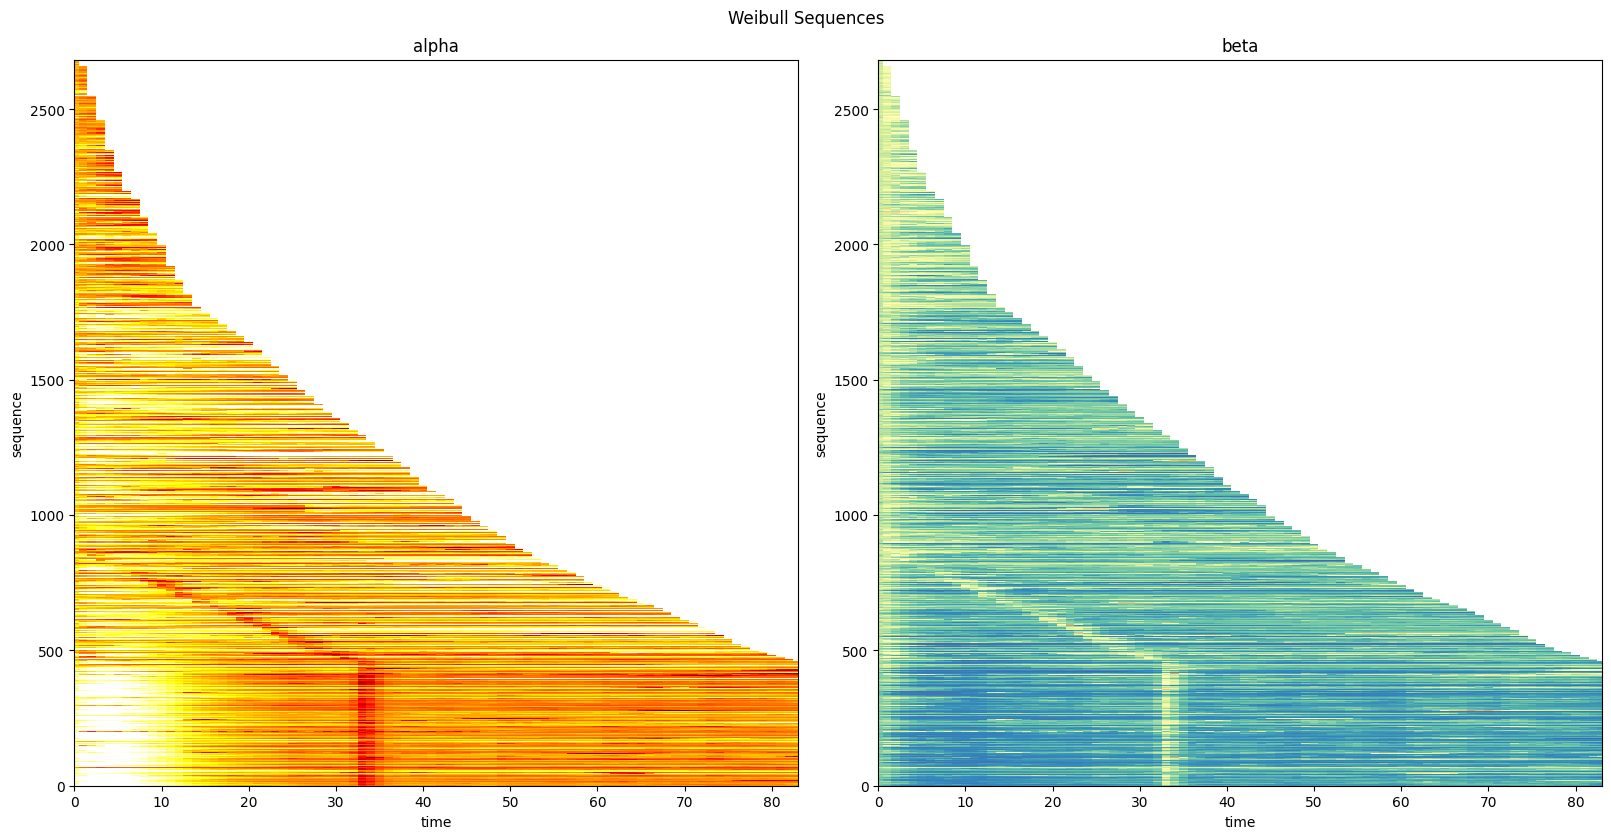

In [10]:
# Plot each customer Weibull alpha and beta parameters over time
model.wtte.plot_params_seq(model.wtte.results)

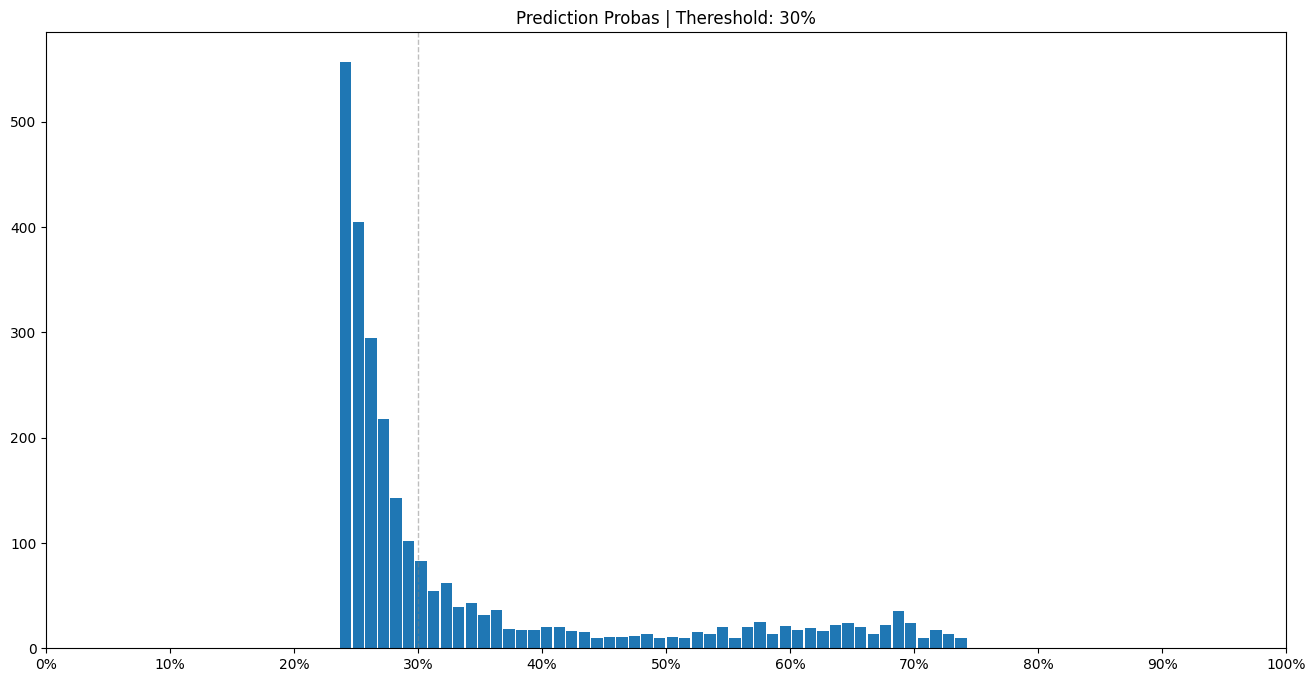

In [11]:
# Plot histogram of predicted probabilities for each customer sequence
model.plot_histogram()

In [6]:
# Get the predictions DataFrame.
df = model.get_predictions(loc=-1)

df

,id,pred,tgt,segment,wa,wb,momentum,cid
83,1,0.320927,1,4,6.762514,0.957939,-22.60,51b46d18c4de615d0f000019
167,2,0.237745,0,1,11.765987,1.631232,1.80,51c6bee4885ef11f7200030b
251,3,0.242149,0,1,9.890182,1.418621,1.07,51d4af244e30af6436000001
335,4,0.238163,0,1,10.793245,1.496010,0.23,51de98a50f42e6597c00009c
419,5,0.237623,0,1,12.707036,1.669206,0.23,51e7ebf61aae11927e00001e
...,...,...,...,...,...,...,...,...
101761,2680,0.579728,1,5,10.998804,0.936187,0.00,66633bcee489710bb6afe3d9
101762,2681,0.564262,1,5,13.892193,1.074853,0.00,666346aee489710bb6afead3
101763,2682,0.628535,1,5,11.334986,0.963761,0.00,66634aea1e0bd65a73bf4f2f
101764,2683,0.573623,1,5,13.499856,1.057204,0.00,666388b3e489710bb6b00925
